## Scipy by Isha Borgaonkar 

## Importing Libraries 

In [6]:
import sys               # Provides access to system-specific parameters and functions
import numpy as np       # Fundamental package for numerical computations in Python
import scipy             # SciPy library for scientific and technical computing

# sys.version returns a string like "3.8.10 (default, May  3 2023, ...)"
# .split()[0] extracts just the version number (e.g., "3.8.10")
print(f"Python: {sys.version.split()[0]}")

# np.__version__ gives the installed NumPy version as a string
print(f"NumPy: {np.__version__}")

# scipy.__version__ gives the installed SciPy version as a string
print(f"SciPy: {scipy.__version__}")


Python: 3.9.13
NumPy: 1.23.5
SciPy: 1.13.1


## Loading Iris Dataset 

In [7]:
from sklearn.datasets import load_iris  # Import function to load the Iris dataset

# The `load_iris()` function returns a Bunch object containing:
# - data: feature matrix (num_samples × num_features)
# - target: array of integer labels (0, 1, 2)
# - feature_names: names of each feature column
data = load_iris()

X, y = data.data, data.target
# X has shape (150, 4): 150 samples, each with 4 features (sepal/petal length & width)
# y has shape (150,): integer labels 0, 1, or 2 corresponding to Iris species
print("Shape:", X.shape)                # Output: (150, 4)
print("Feature names:", data.feature_names)
# Example output: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


 ## Basic Array Operations

In [8]:
import numpy as np  # Import NumPy for numerical operations

# np.mean(X, axis=0) computes the mean of each column (feature) across all samples
print("Mean per feature:", np.mean(X, axis=0))

# np.std(X, axis=0) computes the standard deviation of each feature across all samples
print("Std per feature:", np.std(X, axis=0))

# Subtract the mean of each feature and divide by its standard deviation:
# - X.mean(axis=0) produces a vector of feature means
# - X.std(axis=0) produces a vector of feature standard deviations
# This transformation ensures each feature has mean ≈0 and std ≈1, which helps many algorithms converge faster.
X_std = (X - X.mean(axis=0)) / X.std(axis=0)


Mean per feature: [5.84333333 3.05733333 3.758      1.19933333]
Std per feature: [0.82530129 0.43441097 1.75940407 0.75969263]


## Interpolation

In [9]:
from scipy.interpolate import interp1d  # Import interpolation functions from SciPy
import numpy as np                      # NumPy for numerical operations


# 1. Extract petal lengths for Iris Setosa (class label 0)
# X[y==0, 2] selects all rows where label y is 0 and the 3rd column (petal length)
petals = X[y == 0, 2]  

# Create an index array corresponding to the sample positions
# idx = [0, 1, 2, ..., len(petals)-1]
idx = np.arange(len(petals))


# 2. Create interpolation functions
# interp1d returns a function that can be used to interpolate petal lengths
# kind='linear' creates a piecewise linear interpolator
lin_interp = interp1d(idx, petals, kind='linear')

# kind='cubic' creates a piecewise cubic interpolator for smoother curves
cubic_interp = interp1d(idx, petals, kind='cubic')

# 3. Define a finer grid for interpolation
# np.linspace(0, len(petals)-1, 200) generates 200 evenly spaced points between 0 and last index
fine_idx = np.linspace(0, len(petals) - 1, 200)

# 4. Evaluate interpolators on the finer grid
# petal_lin and petal_cub contain interpolated petal lengths
petal_lin = lin_interp(fine_idx)
petal_cub = cubic_interp(fine_idx)


## Numerical Integration

In [10]:
from scipy.integrate import quad  # Function for numerical integration (quadrature)
import math                       # Access to mathematical functions/constants

# 1. Define the Gaussian (normal) probability density function (PDF)
def gauss(x, mu=0, sigma=1):
    """
    Compute the value of a Gaussian PDF at x.

    Parameters:
    - x: point at which to evaluate the PDF
    - mu: mean of the distribution (default 0)
    - sigma: standard deviation (default 1)

    Returns:
    - PDF value at x
    """
    # 1/(σ * sqrt(2π)) is the normalization constant
    norm_const = 1 / (sigma * math.sqrt(2 * math.pi))
    # exponent: exp(-0.5 * ((x - μ)/σ)^2)
    exponent = math.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return norm_const * exponent

# 2. Integrate the Gaussian PDF over the interval [-3, 3]
# quad(func, a, b) returns a tuple (integral, estimated_error)
# The interval [-3, 3] covers approximately 99.7% of the total area for a standard normal distribution.
area, err = quad(gauss, -3, 3)


# 3. Display the result
print(f"Approximate area under Gaussian from -3 to 3: {area:.5f}")
print(f"Estimated integration error: {err:.2e}")


Approximate area under Gaussian from -3 to 3: 0.99730
Estimated integration error: 1.11e-14


## Root Finding & Optimization

In [11]:
from scipy.optimize import root, minimize  # Import root solver and optimizer
import numpy as np                        # NumPy for numerical operations


# 1. Root finding for f(x) = cos(x) – x
# Define the function f(x)
# We seek x such that cos(x) - x = 0
f = lambda x: np.cos(x) - x

# Use a nonlinear solver with an initial guess x0 = 0.5
# `root` returns an OptimizeResult; sol.x is the solution array
sol = root(f, x0=0.5)
print("Root of cos(x) - x:", sol.x[0])


# 2. Minimization of Rosenbrock’s function
# Rosenbrock’s “banana” function:
# f(v) = (1 - v[0])^2 + 100 * (v[1] - v[0]^2)^2
# It has a global minimum at (1, 1)
rosen = lambda v: (1 - v[0])**2 + 100 * (v[1] - v[0]**2)**2

# Use BFGS algorithm starting from initial point [0, 0]
# `minimize` returns an OptimizeResult; res.x is the minimizer
res = minimize(rosen, x0=[0, 0], method='BFGS')
print("Rosenbrock minimum at:", res.x)


Root of cos(x) - x: 0.7390851332151601
Rosenbrock minimum at: [0.99999467 0.99998932]


## Linear Algebra

In [12]:
import numpy as np
from scipy.linalg import lu, svd, eigh  # Import LU decomposition, SVD, and symmetric eigensolver


# 1. Create a symmetric matrix A and vector b
# A is a 3×3 symmetric matrix
A = np.array([
    [3, 2, 1],
    [2, 3, 2],
    [1, 2, 3]
])
# b is the right-hand side vector for the linear system Ax = b
b = np.array([1, 2, 3])

# 2. Solve the linear system Ax = b
# np.linalg.solve returns the solution vector x such that A @ x = b
x = np.linalg.solve(A, b)
print("Solution x:", x)

# 3. Perform LU decomposition of A
# lu(A) returns (P, L, U):
# - P is the permutation matrix
# - L is lower-triangular with unit diagonal
# - U is upper-triangular
P, L, U = lu(A)
print("Permutation matrix P:\n", P)
print("Lower-triangular L:\n", L)
print("Upper-triangular U:\n", U)

# 4. Compute Singular Value Decomposition (SVD) of A
# svd(A) returns (U, s, Vh):
# - U and Vh are orthogonal matrices
# - s is the vector of singular values
U_svd, s, Vh = svd(A)
print("Singular values of A:", s)

# 5. Compute eigenvalues and eigenvectors of the symmetric matrix A
# eigh(A) is optimized for Hermitian (symmetric) matrices
# It returns:
# - vals: sorted eigenvalues
# - vecs: corresponding eigenvectors (columns)
vals, vecs = eigh(A)
print("Eigenvalues:", vals)
print("Eigenvectors (columns):\n", vecs)


Solution x: [-5.18104078e-17  1.33226763e-16  1.00000000e+00]
Permutation matrix P:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Lower-triangular L:
 [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]]
Upper-triangular U:
 [[3.         2.         1.        ]
 [0.         1.66666667 1.33333333]
 [0.         0.         1.6       ]]
Singular values of A: [6.37228132 2.         0.62771868]
Eigenvalues: [0.62771868 2.         6.37228132]
Eigenvectors (columns):
 [[ 4.54401349e-01 -7.07106781e-01  5.41774320e-01]
 [-7.66184591e-01 -5.55111512e-17  6.42620551e-01]
 [ 4.54401349e-01  7.07106781e-01  5.41774320e-01]]


## Statistics & Probability

In [13]:
from scipy import stats  # Statistical functions in SciPy

# 1. Compute skewness and kurtosis for each feature in X
# stats.skew computes the asymmetry of the distribution of each column
skewness = stats.skew(X)  
# stats.kurtosis computes the “tailedness” (peakedness) of each column's distribution
kurtosis = stats.kurtosis(X)  

print("Skewness per feature:", skewness)
print("Kurtosis per feature:", kurtosis)


# 2. Perform an independent two-sample t-test on Sepal Length
# Compare the mean sepal length between Iris Setosa (label 0) and Versicolor (label 1)
# X[:,0] is the first column: sepal length
setosa_sepal = X[y == 0, 0]      # Sepal lengths for class 0 (Setosa)
versicolor_sepal = X[y == 1, 0]  # Sepal lengths for class 1 (Versicolor)

# stats.ttest_ind returns the t-statistic and p-value for the hypothesis test
tstat, pval = stats.ttest_ind(setosa_sepal, versicolor_sepal)

print(f"T-test between Setosa and Versicolor sepal-length: t={tstat:.3f}, p={pval:.3f}")


Skewness per feature: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurtosis per feature: [-0.57356795  0.18097632 -1.39553589 -1.33606741]
T-test between Setosa and Versicolor sepal-length: t=-10.521, p=0.000


## Signal Processing

In [14]:
from scipy import signal  # Signal processing functions
import numpy as np       # Numerical computations

# 1. Generate a noisy signal
fs = 100.0                          # Sampling frequency in Hz
t = np.arange(0, 2.0, 1/fs)        # Time vector from 0 to 2 seconds at 100 Hz
# Create a 5 Hz sine wave and add Gaussian noise (mean 0, std 0.5)
sig = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# 2. Design a Butterworth band-pass filter
# N = filter order (4)
# Wn = [4, 6] defines passband frequencies (4–6 Hz)
# fs = sampling rate to interpret Wn in Hz
b, a = signal.butter(N=4, Wn=[4, 6], fs=fs, btype='band')

# 3. Apply zero-phase filtering
# filtfilt applies the filter forward and backward to eliminate phase shift
filtered = signal.filtfilt(b, a, sig)

# 'filtered' now contains the 5 Hz component with noise outside 4–6 Hz greatly attenuated


## Fourier Transform

In [15]:
from scipy.fft import fft, fftfreq  # Import FFT functions from SciPy

# 1. Compute the Fast Fourier Transform (FFT)
# fft(filtered) computes the discrete Fourier transform of the filtered signal
yf = fft(filtered)

# 2. Compute corresponding frequency bins
# fftfreq(n, d) returns array of frequency bins for n samples with spacing d seconds
# Here, n = len(t), d = 1/fs (sampling interval)
xf = fftfreq(len(t), 1 / fs)

# 3. Select only positive frequencies
# FFT output is symmetrical for real inputs, so we often look at xf > 0
pos = xf > 0

# Now you can plot the magnitude spectrum for positive frequencies:
# plt.plot(xf[pos], np.abs(yf[pos]))


## Image Processing

C:\Users\ISHA\AppData\Local\Temp\ipykernel_14752\3398602288.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = face(gray=True).astype(float)


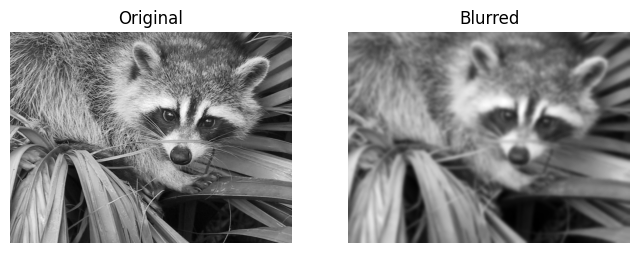

In [22]:
from scipy import ndimage
import matplotlib.pyplot as plt

# Sample image from SciPy
from scipy.misc import face
img = face(gray=True).astype(float)

# Apply Gaussian blur
blur = ndimage.gaussian_filter(img, sigma=5)

# Display
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(img, cmap='gray'); axes[0].set_title("Original")
axes[1].imshow(blur, cmap='gray'); axes[1].set_title("Blurred")
for ax in axes: ax.axis('off')
plt.show()


## ODE Solving

In [25]:
from scipy.integrate import solve_ivp  # ODE solver for initial value problems
import numpy as np                     # Numerical operations

# 1. Define the logistic growth differential equation
def logistic(t, P, r=0.5, K=10):
    """
    Logistic growth model dP/dt = r * P * (1 - P/K)
    
    Parameters:
    - t: time (unused in this autonomous equation, but required by solver)
    - P: population at time t
    - r: intrinsic growth rate (default 0.5)
    - K: carrying capacity (default 10)
    
    Returns:
    - dP/dt: rate of change of the population
    """
    return r * P * (1 - P / K)

# 2. Solve the ODE over the interval t = 0 to 20
# t_span: start and end times
# y0: initial population P(0) = 1
# t_eval: array of time points at which to store the solution
sol = solve_ivp(
    fun=logistic,                   # The ODE function
    t_span=[0, 20],                 # Time interval for integration
    y0=[1],                         # Initial population
    t_eval=np.linspace(0, 20, 200)  # Times to evaluate the solution
)

# 3. Access the solution
# sol.t contains the time points (same as t_eval)
# sol.y[0] contains the population values at each time point
time_points = sol.t
population = sol.y[0]

# Example: print first few values
for t, P in zip(time_points[:5], population[:5]):
    print(f"At time {t:.2f}, population ≈ {P:.3f}")


At time 0.00, population ≈ 1.000
At time 0.10, population ≈ 1.046
At time 0.20, population ≈ 1.094
At time 0.30, population ≈ 1.144
At time 0.40, population ≈ 1.196


## Special Functions

In [26]:
from scipy.special import jv, gamma  # Import special functions: Bessel J and Gamma

# 1. Compute the Bessel function of the first kind, order 0, at x = 1.0
# jv(n, x) computes Jₙ(x), the Bessel function of the first kind of order n
# Here, we use n=0 to get J₀(1.0)
j0_at_1 = jv(0, 1.0)
print("J0(1):", j0_at_1)  # Expected ≈ 0.7651976866


# 2. Compute the Gamma function at 5
# gamma(z) generalizes the factorial function for real (and complex) inputs:
# gamma(n) = (n-1)! for positive integers n
# So gamma(5) = 4! = 24
gamma_of_5 = gamma(5)
print("Gamma(5):", gamma_of_5)  # Should print 24.0


J0(1): 0.7651976865579666
Gamma(5): 24.0


## Sparse Matrices & Graphs

In [31]:
import numpy as np
from scipy.sparse import diags           # Function to create sparse diagonal matrices
from scipy.sparse.linalg import spsolve  # Sparse linear system solver

# 1. Define problem size and right-hand side
N = 1000                        # Size of the linear system (N × N)
b = np.ones(N)                  # RHS vector of all ones

# 2. Construct a tridiagonal sparse matrix A
# We want A with:
# - 2s on the main diagonal
# - -1s on the first sub- and super-diagonals
#
# `diag` is a list of three arrays:
#   diag[0]: main diagonal of length N
#   diag[1]: sub-diagonal of length N-1 (below main)
#   diag[2]: super-diagonal of length N-1 (above main)
diag = [
    2 * np.ones(N),       # Main diagonal entries (2)
    -1 * np.ones(N - 1),  # Sub-diagonal entries (-1)
    -1 * np.ones(N - 1)   # Super-diagonal entries (-1)
]
offsets = [0, -1, 1]      # Positions of the diagonals: 0=main, -1=sub, +1=super

# Create the sparse matrix in DIAgonal form
A = diags(diag, offsets, format='csc')  # Use CSC format for efficient solving

# 3. Solve the sparse linear system A x = b
# spsolve automatically detects the sparsity pattern and chooses an efficient solver
x = spsolve(A, b)

# 4. (Optional) Verify solution quality
# Compute the residual norm ||A x - b||
residual = A.dot(x) - b
res_norm = np.linalg.norm(residual)
print(f"Residual norm: {res_norm:.2e}")


Residual norm: 2.94e-10


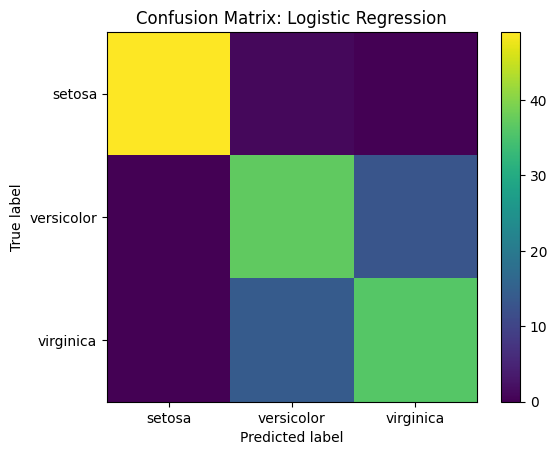

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Load Iris dataset (first two features for easy 2D plotting)
iris = load_iris()
X = iris.data[:, :2]  # Sepal length and sepal width
y = iris.target

# 1. Logistic Regression & Confusion Matrix
# Pipeline: scale features then train logistic regression
clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, random_state=42))
clf.fit(X, y)
y_pred = clf.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.xticks([0, 1, 2], iris.target_names)
plt.yticks([0, 1, 2], iris.target_names)
plt.show()

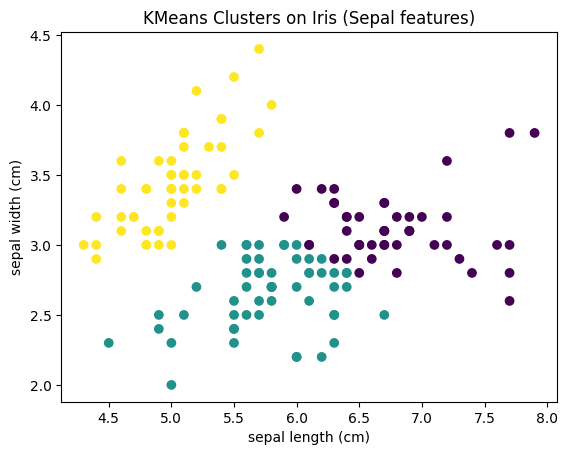

In [29]:
# 2. KMeans Clustering Scatter Plot
# Cluster into 3 groups on scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Scatter plot of true vs cluster assignments
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o')
plt.title('KMeans Clusters on Iris (Sepal features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()